In [55]:
from sklearn import datasets
import matplotlib.pyplot as plt

digits = datasets.load_digits()

In [56]:
from sklearn.model_selection import train_test_split
import numpy as np

X = digits.data
y = digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. k-Nearest Neighbors

In [57]:
from sklearn.neighbors import KNeighborsClassifier

accuracies = []
for k in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    accuracy = knn.score(X_test, y_test)
    accuracies.append(accuracy)

C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

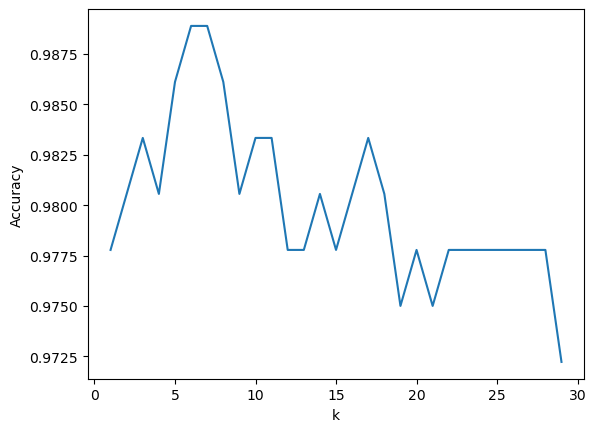

In [58]:
plt.plot(k_values, accuracies)
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.show()

# 2. Support Vector Machine

In [60]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report


models = [
    ('all', SVC(kernel='linear', degree=3, C=1.0, cache_size=200, class_weight=None, coef0=0.0, decision_function_shape='ovr', gamma='auto', max_iter=-1, probability=False, random_state=None, shrinking=True, tol=0.001, verbose=False)),
]


for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred)
    print(f"Kernel: {name}")
    print(report)
    accuracy2 = model.score(X_test, y_test)
    accuracies.append(accuracy2)
    

Kernel: all
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.97      1.00      0.98        28
           2       1.00      1.00      1.00        33
           3       0.97      0.94      0.96        34
           4       0.98      0.98      0.98        46
           5       0.96      1.00      0.98        47
           6       1.00      1.00      1.00        35
           7       0.97      0.97      0.97        34
           8       1.00      0.97      0.98        30
           9       0.95      0.93      0.94        40

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



# 3. Naïve Bayes 

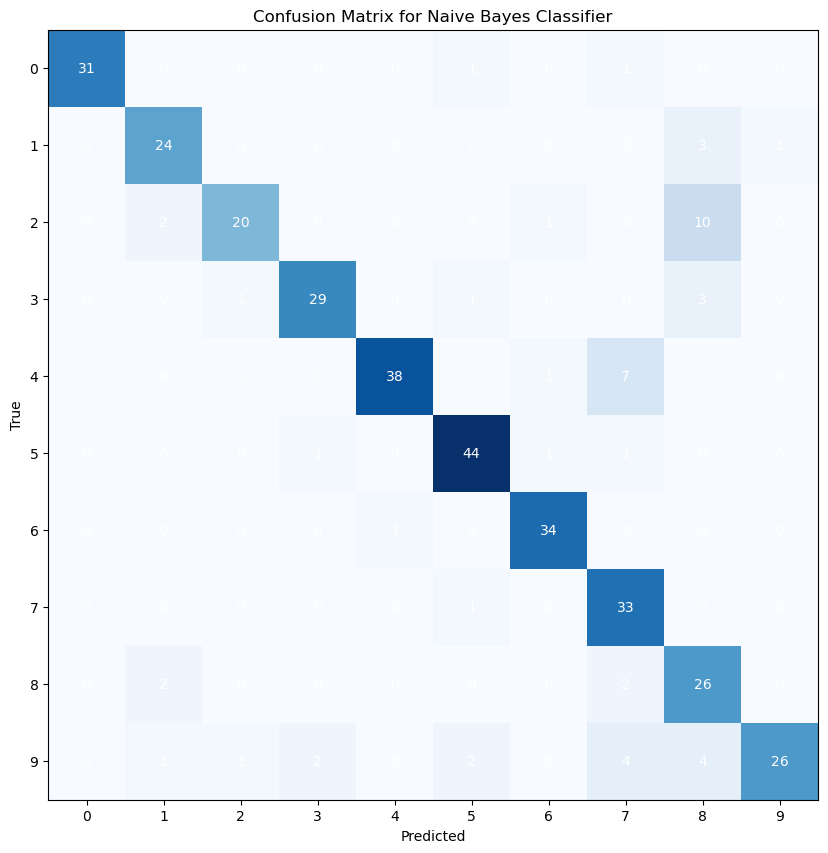

In [61]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np


nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
accuracy3 = nb.score(X_test, y_test)
accuracies.append(accuracy3)

accuracy = nb.score(X_test, y_test)
cm = confusion_matrix(y_test, y_pred)


fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(cm, cmap=plt.cm.Blues)
ax.set_xticks(np.arange(len(np.unique(y_test))))
ax.set_yticks(np.arange(len(np.unique(y_test))))
ax.set_xticklabels(np.unique(y_test))
ax.set_yticklabels(np.unique(y_test))
ax.set_xlabel('Predicted')
ax.set_ylabel('True')
for i in range(len(np.unique(y_test))):
    for j in range(len(np.unique(y_test))):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.title('Confusion Matrix for Naive Bayes Classifier')
plt.show()

C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


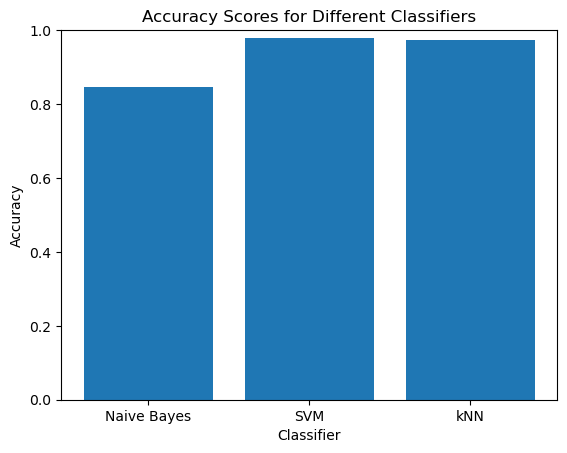

In [63]:
classifiers = [
    ('Naive Bayes', nb),
    ('SVM', model),
    ('kNN', knn)
]
accuracies = []
for name, clf in classifiers:
    clf.fit(X_train, y_train)
    accuracy = clf.score(X_test, y_test)
    accuracies.append(accuracy)


plt.bar([name for name, clf in classifiers], accuracies)
plt.ylim([0, 1])
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Accuracy Scores for Different Classifiers')
plt.show()